In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

%matplotlib inline

In [2]:
def mesh(L,N):
    x = np.linspace(0,L,N+2)
    return (L / (N+1), x)

In [27]:
def Laplaciano1D(N, h, ht, Gamma, rho, v):
    a =  ht * Gamma / h**2
    b =  ht * rho * v / (2*h)
    A = np.zeros((N,N))
    A[0,0] = 2 * a + 1
    A[0,1] = b - a
    for i in range(1,N-1):
        A[i,i] = 2 * a + 1
        A[i,i+1] = b - a
        A[i,i-1] = -b - a
    A[N-1,N-2] = -b - a
    A[N-1,N-1] = 2 * a + 1
    return A

In [59]:
def plotSol(xa, ua, style='classic'):
    with plt.style.context(style):
        plt.figure(figsize=(10,5))
        plt.plot(xa,ua, 'k-', lw=2.5, label='Analítica')
        plt.xlabel('x [m]')
        plt.ylabel('u')
        plt.grid()

In [21]:
def analyticSol(par, NP = 100):
    L     = par['L']
    v     = par['v']
    Gamma = par['Gamma']
    t     = par['ht'] * par['Tmax']
    
    xa = np.linspace(0, L, NP)
    
    divisor = 2 * np.sqrt(Gamma * t)
    ua = 0.5 * (special.erfc((xa - v * t)/ divisor) + 
                np.exp(v * xa) * np.exp(-Gamma) * special.erfc((xa + v * t)/divisor))
    return (xa, ua)

In [64]:
def fdmSol(par):
    L     = par['L']
    Gamma = par['Gamma']
    rho   = par['rho']
    v     = par['v']
    N     = par['N']
    phi0  = par['BC'][0]
    phiL  = par['BC'][1]
    h     = par['h']
    ht    = par['ht']
    Tmax  = par['Tmax']
    freq  = par['freq']
    
    u = np.zeros(N+2)
    u[0] = phi0
    u[-1] = phiL

    f = np.zeros(N)     
    f[0] = phi0
    
    x = np.linspace(0,L,N+2)
    for i in range(1, Tmax+1):
        A = Laplaciano1D(N, h, ht, Gamma, rho, v) # Matriz del sistema

        f = np.copy(u[1:N+1])
        f[0]   +=  phi0 * (rho * v / (2*h) + Gamma / h**2) * ht
        f[N-1] += -phiL * (rho * v / (2*h) - Gamma / h**2) * ht

        u[1:N+1] = np.linalg.solve(A,f)

        if (i % freq == 0):
            etiqueta = 'Step = {}'.format(i*ht)
            plt.plot(x, u, '.--', label=etiqueta)

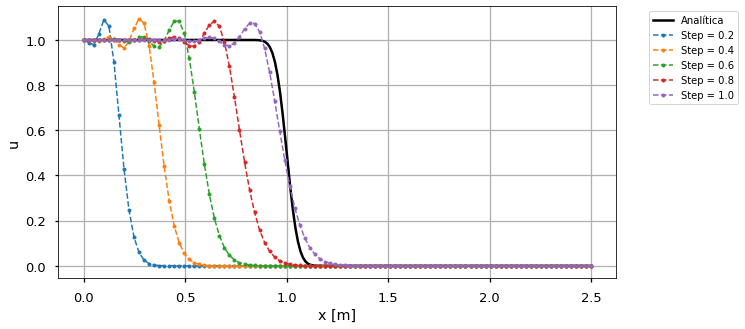

In [73]:
par = {}
par['L']     = 2.5 # m
par['rho']   = 1.0 # kg/m^3
par['v']     = 1.0 # m/s
par['Gamma'] = 0.001 # kg / m.s
par['BC']    = (1.0, 0.0)
par['N']     = 100 # Número de incógnitas
par['Tmax']  = 500
par['ht']    = 0.002
par['freq']  = 100

h, x = mesh(par['L'], par['N'])

par['h'] = h
xa, ua = analyticSol(par,200)

plotSol(xa, ua, 'seaborn-talk')
fdmSol(par)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()